# Books Recommender system using clustering
Collaborative filtering


In [328]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


In [329]:
books = pd.read_csv(
    'data/BX-Books.csv', 
    sep=";", on_bad_lines='skip',
    low_memory=False ,
    encoding='latin-1')

In [330]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [331]:
books.shape

(271360, 8)

In [332]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

## Count books by year

### Bar char

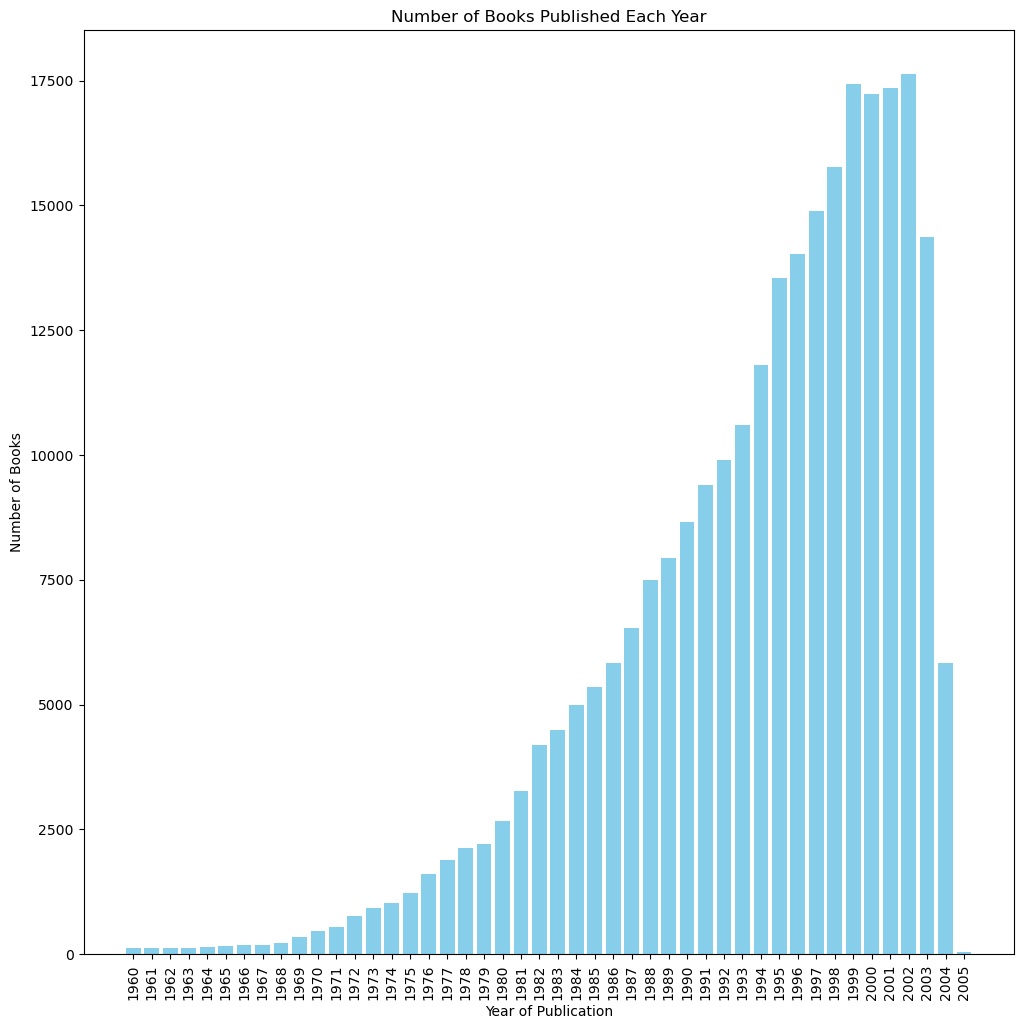

In [333]:
import pandas as pd
import matplotlib.pyplot as plt

yearly_counts = books['Year-Of-Publication'].value_counts().sort_index()
yearly_counts = yearly_counts[(yearly_counts.index >= '1960')&('2005'>=yearly_counts.index) ]

min_year = yearly_counts.index.min()
max_year = yearly_counts.index.max()

yearly_counts = yearly_counts.loc[min_year:max_year]

plt.figure(figsize=(12, 12))
plt.bar(yearly_counts.index, yearly_counts.values, color='skyblue')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.title('Number of Books Published Each Year')
plt.xticks(rotation=90)  
plt.show()

## Pie char

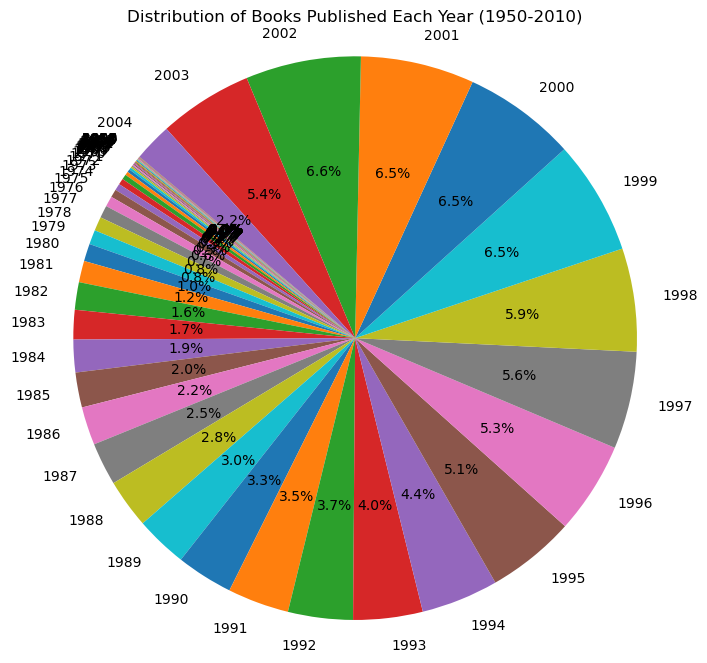

In [334]:
import pandas as pd
import matplotlib.pyplot as plt

yearly_counts = books['Year-Of-Publication'].value_counts().sort_index()
yearly_counts = yearly_counts[(yearly_counts.index >= '1950') & (yearly_counts.index <= '2010')]

plt.figure(figsize=(8, 8))
plt.pie(yearly_counts.values, labels=yearly_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Books Published Each Year (1950-2010)')
plt.axis('equal')  
plt.show()

## Top 15 author who have written the most books

In [335]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

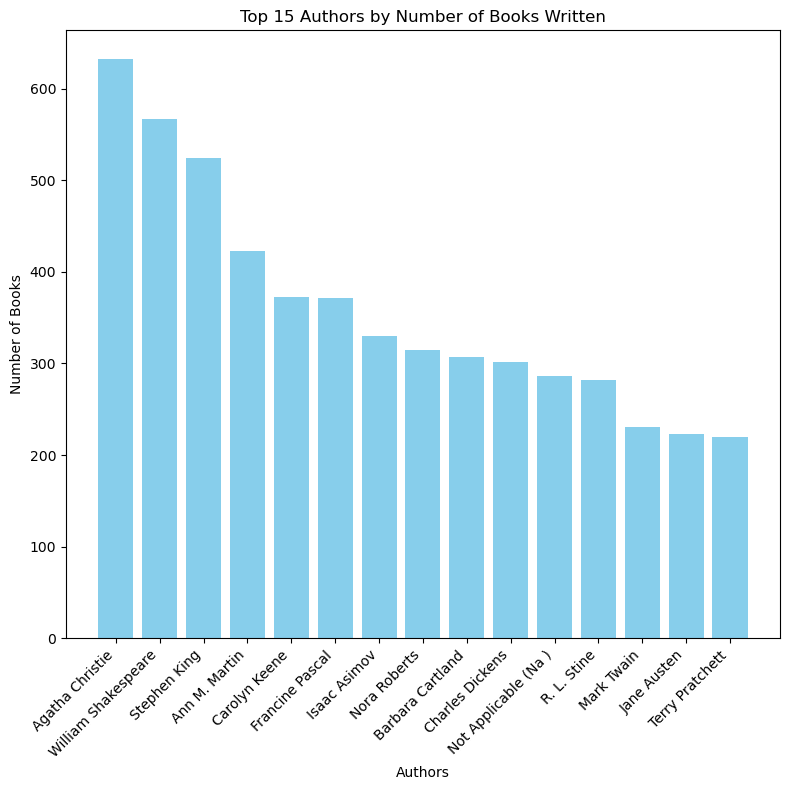

In [336]:
import pandas as pd
import matplotlib.pyplot as plt

author_counts = books['Book-Author'].value_counts()
top_15_authors = author_counts.head(15)

plt.figure(figsize=(8, 8))
plt.bar(top_15_authors.index, top_15_authors.values, color='skyblue')
plt.xlabel('Authors')
plt.ylabel('Number of Books')
plt.title('Top 15 Authors by Number of Books Written')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  
plt.show()

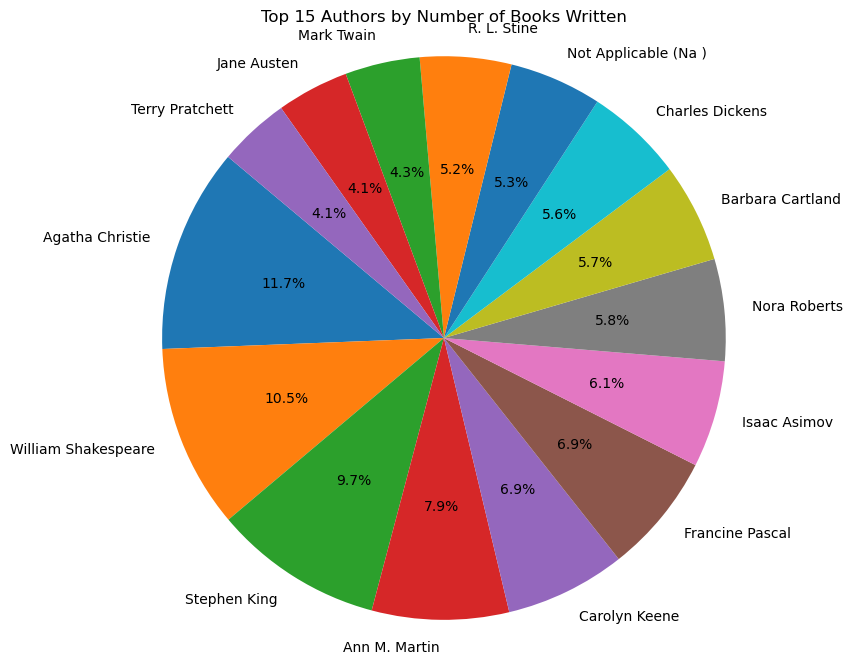

In [337]:
import pandas as pd
import matplotlib.pyplot as plt

author_counts = books['Book-Author'].value_counts()
top_15_authors = author_counts.head(15)


plt.figure(figsize=(8, 8))
plt.pie(top_15_authors.values, labels=top_15_authors.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 15 Authors by Number of Books Written')
plt.axis('equal') 
plt.show()

## Top publishers with the most books

In [338]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

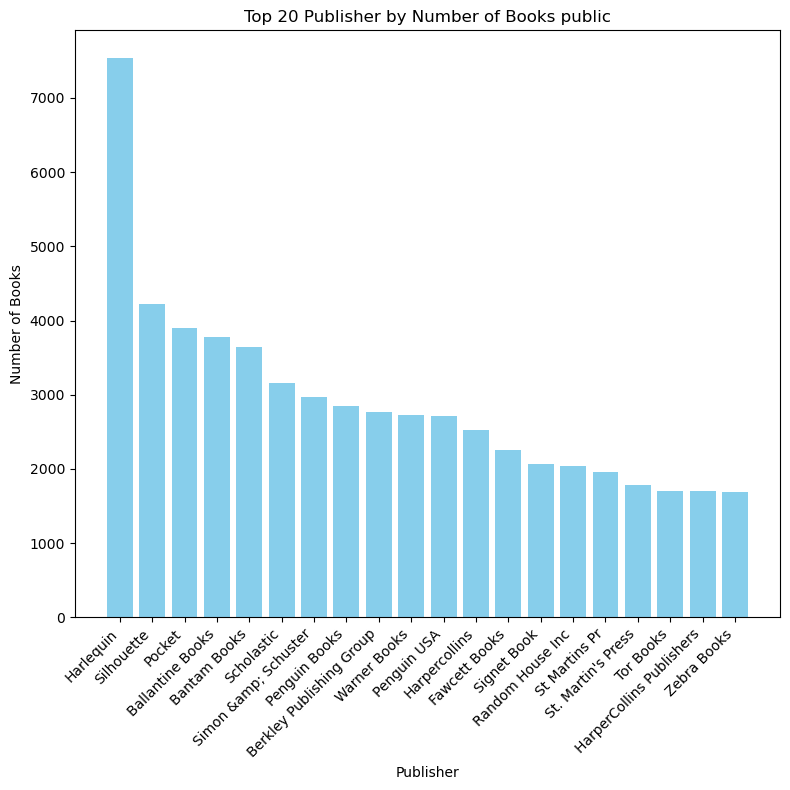

In [339]:
import pandas as pd
import matplotlib.pyplot as plt

publisher_counts = books['Publisher'].value_counts()
top_20_publishers = publisher_counts.head(20)

plt.figure(figsize=(8, 8))
plt.bar(top_20_publishers.index, top_20_publishers.values, color='skyblue')
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.title('Top 20 Publisher by Number of Books public')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout() 
plt.show()

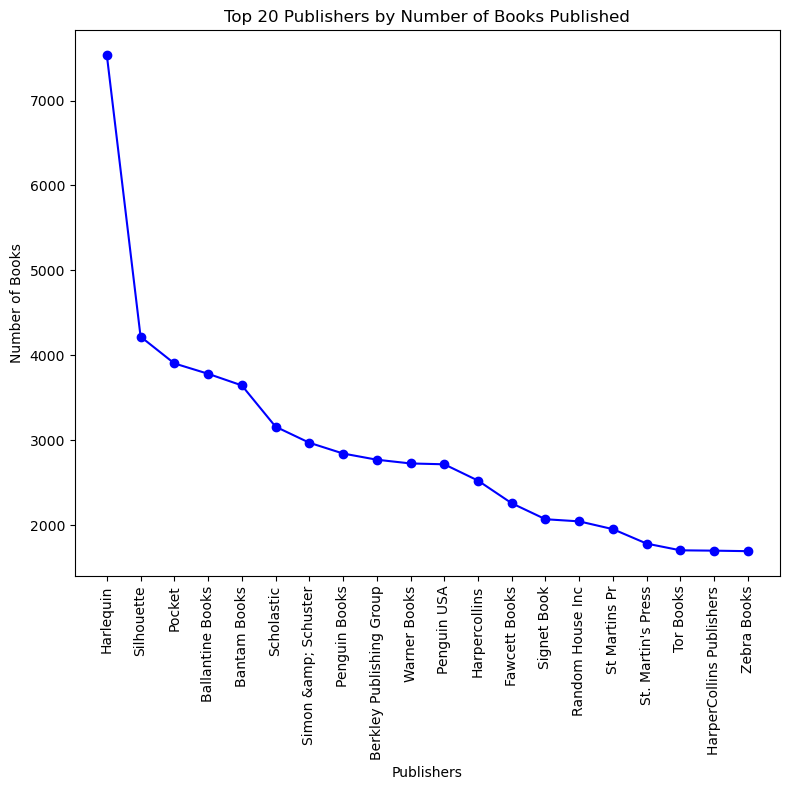

In [340]:
import pandas as pd
import matplotlib.pyplot as plt

publisher_counts = books['Publisher'].value_counts()
top_20_publishers = publisher_counts.head(20)

plt.figure(figsize=(8, 8))
plt.plot(top_20_publishers.index, top_20_publishers.values, marker='o', linestyle='-', color='b')
plt.xlabel('Publishers')
plt.ylabel('Number of Books')
plt.title('Top 20 Publishers by Number of Books Published')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()

## Remove large url size


In [341]:
books.shape

(271360, 8)

In [342]:

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [343]:
books.iloc[237]['Image-URL-L']

'http://images.amazon.com/images/P/0671027387.01.LZZZZZZZ.jpg'

In [344]:
books.iloc[237]['Image-URL-S']

'http://images.amazon.com/images/P/0671027387.01.THUMBZZZ.jpg'

In [345]:

books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [346]:
books.shape

(271360, 6)

In [347]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [348]:

books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [349]:
books.head()

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


## User rating dataframe

In [350]:

users = pd.read_csv('data/BX-Users.csv', sep=";", on_bad_lines='skip',low_memory=False , encoding='latin-1')

In [351]:
users.shape

(278858, 3)

In [352]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [353]:

users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [354]:
users.head(2)

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0


## Visualize age feature

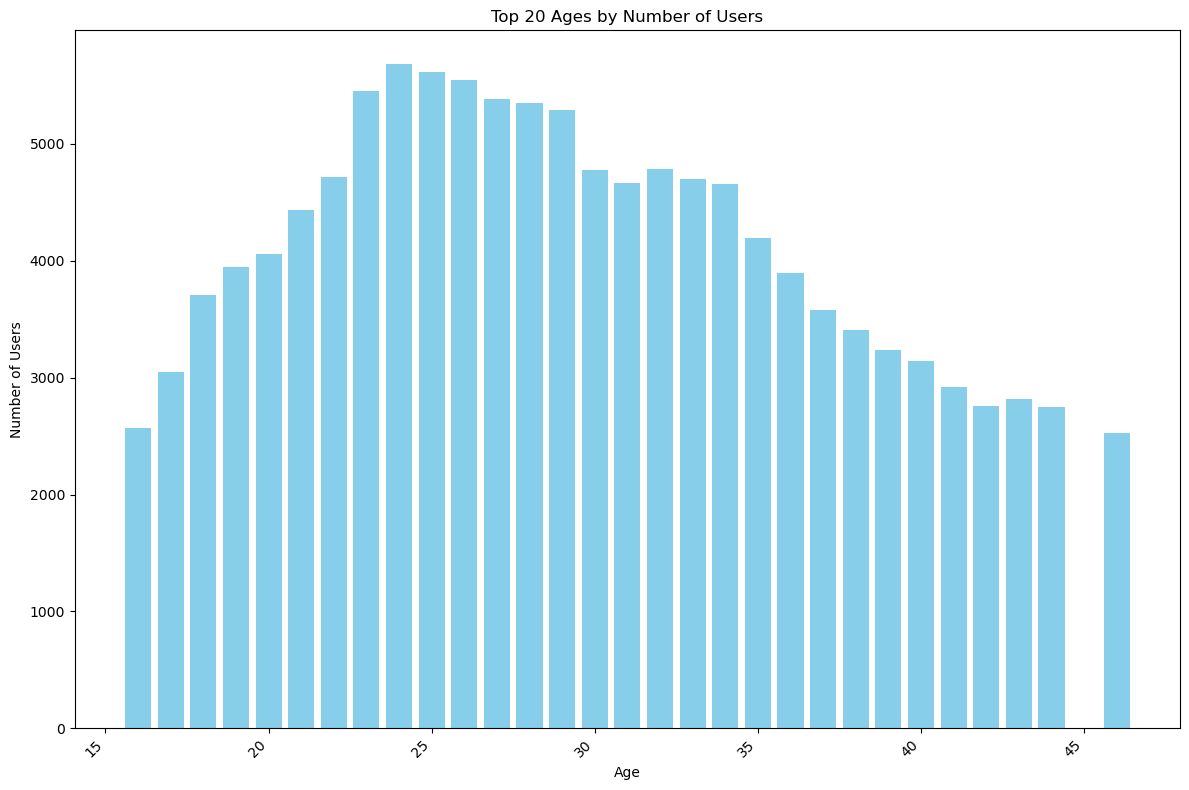

In [355]:
import pandas as pd
import matplotlib.pyplot as plt

age_counts = users['age'].value_counts()
top_20_ages = age_counts.head(30)


plt.figure(figsize=(12, 8))
plt.bar(top_20_ages.index, top_20_ages.values, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.title('Top 20 Ages by Number of Users')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

# Rating dataframe

In [356]:

ratings = pd.read_csv('data/BX-Book-Ratings.csv', sep=";", on_bad_lines='skip',low_memory=False , encoding='latin-1')

In [357]:
ratings.shape

(1149780, 3)

In [358]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [359]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Count the number of votes for each star rating

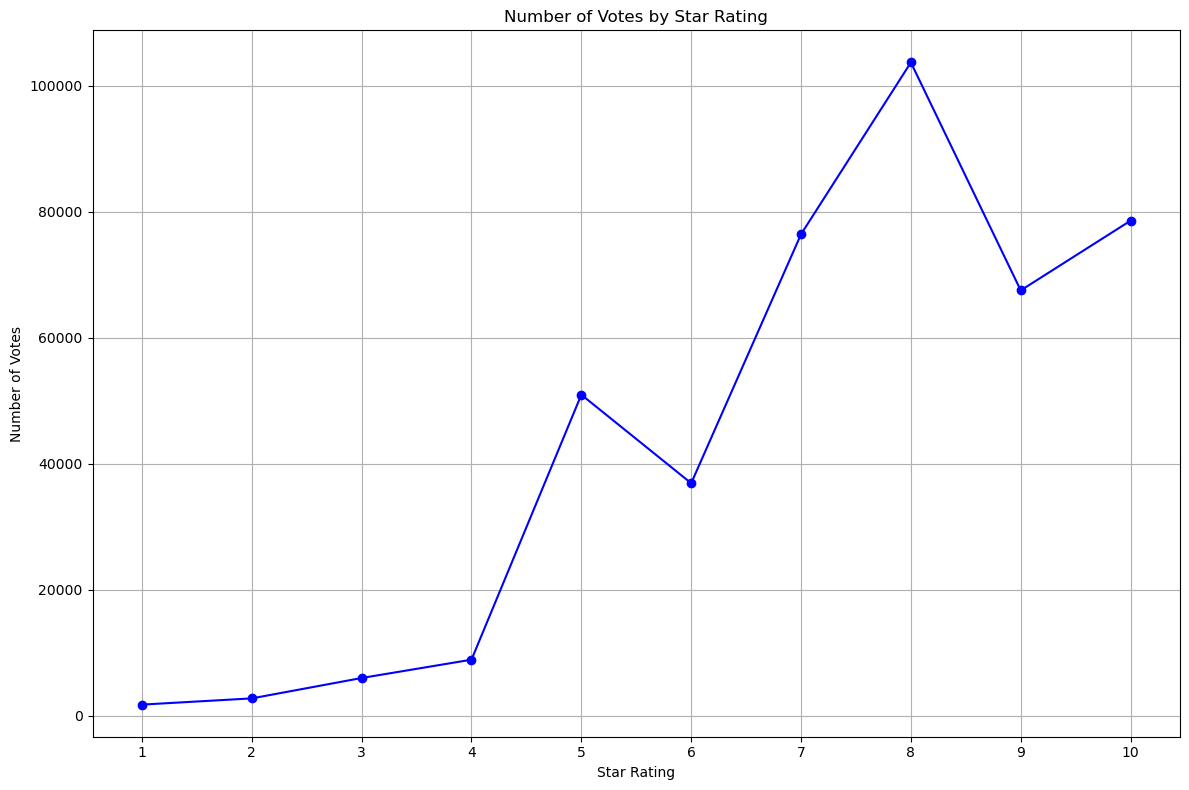

In [360]:
import pandas as pd
import matplotlib.pyplot as plt

filtered_ratings = ratings[ratings['Book-Rating'] != 0]
star_counts = filtered_ratings['Book-Rating'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
plt.plot(star_counts.index, star_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Star Rating')
plt.ylabel('Number of Votes')
plt.title('Number of Votes by Star Rating')
plt.xticks(star_counts.index)  
plt.grid(True)  
plt.tight_layout()  
plt.show()

## Count the number of votes for each user

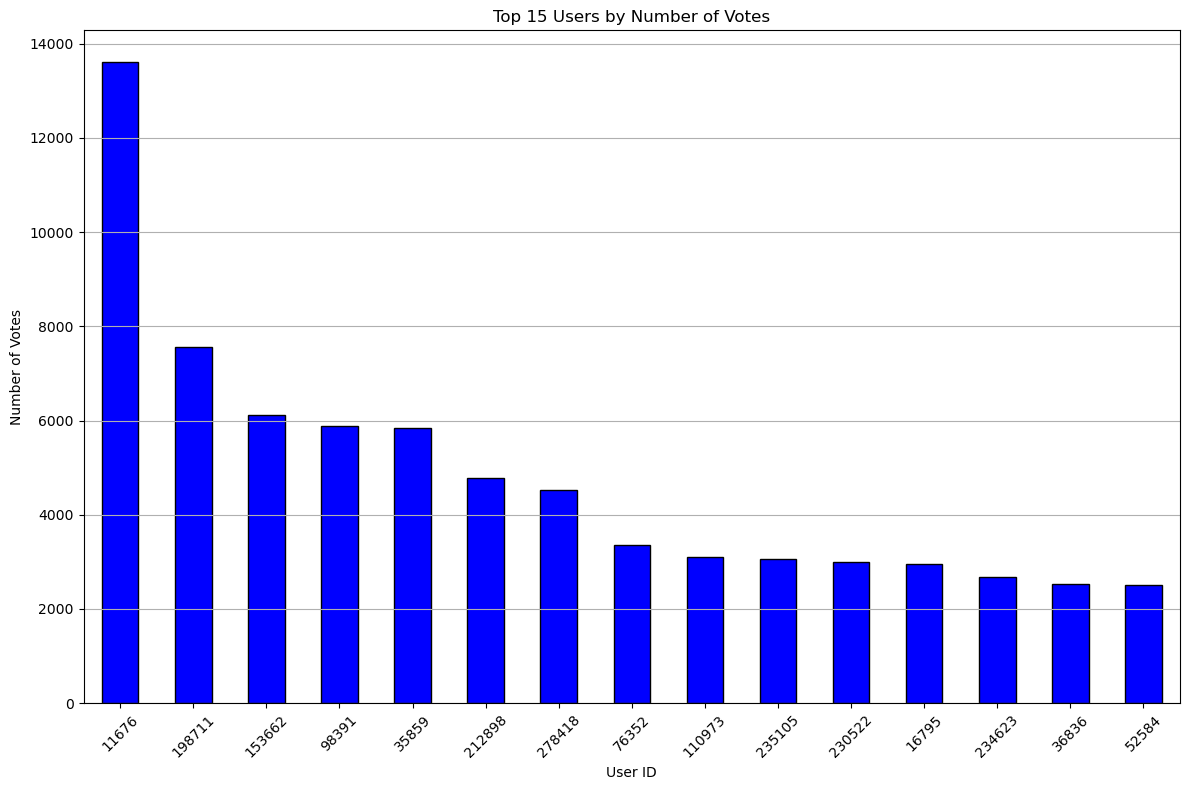

In [361]:
import pandas as pd
import matplotlib.pyplot as plt

user_vote_counts = ratings['User-ID'].value_counts()
top_15_users = user_vote_counts.head(15)

plt.figure(figsize=(12, 8))
top_15_users.plot(kind='bar', color='b', edgecolor='black')
plt.xlabel('User ID')
plt.ylabel('Number of Votes')
plt.title('Top 15 Users by Number of Votes')
plt.xticks(rotation=45) 
plt.grid(axis='y')  
plt.tight_layout()  
plt.show()

In [362]:

ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'rating'},inplace=True)

In [363]:
print(f'book dataframe {books.shape}\nusers dataframe {users.shape}\nratings dataframe {ratings.shape}')

book dataframe (271360, 6)
users dataframe (278858, 3)
ratings dataframe (1149780, 3)


In [364]:

x = ratings['user_id'].value_counts() > 200
x = x[x]
y= x.index


In [365]:
ratings.shape

(1149780, 3)

In [366]:
ratings['user_id'].isin(y)


0          False
1          False
2          False
3          False
4          False
           ...  
1149775    False
1149776    False
1149777    False
1149778    False
1149779    False
Name: user_id, Length: 1149780, dtype: bool

In [367]:
ratings = ratings[ratings['user_id'].isin(y)]

In [368]:
ratings.shape

(526356, 3)

In [369]:
ratings['user_id'].unique().shape

(899,)

# Join ratings with books

In [370]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [371]:
books.head()

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [372]:

ratings_with_books = ratings.merge(books, on='ISBN')

In [373]:
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...


In [374]:
ratings_with_books.shape

(487671, 8)

In [375]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [376]:
number_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [377]:
number_rating.shape

(160269, 2)

In [378]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [379]:
number_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [380]:
final_rating = ratings_with_books.merge(number_rating, on='title')

In [381]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,7
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,1
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,1
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,13


In [382]:
final_rating.shape

(487671, 9)

In [383]:

final_rating = final_rating[final_rating['num_of_rating'] >= 50]


In [384]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,133
15,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,108
24,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,79


In [385]:
final_rating.shape

(61853, 9)

In [386]:

final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [387]:
final_rating.shape

(59850, 9)

In [388]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,133
15,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,108
24,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,79


# Encoder and training model

In [389]:

book_pivot = final_rating.pivot_table(
    columns='user_id',
    index='title',
    values= 'rating'
    )

In [390]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [391]:
book_pivot.shape

(742, 888)

In [392]:
book_pivot.fillna(0, inplace=True)

In [393]:
book_pivot.head()

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0


In [394]:
from sklearn.model_selection import train_test_split

train_pivot, test_pivot = train_test_split(book_pivot, test_size=0.2, random_state=42)

print(f"Train shape: {train_pivot.shape}")
print(f"Test shape: {test_pivot.shape}")

Train shape: (593, 888)
Test shape: (149, 888)


# Visual training data , testing data

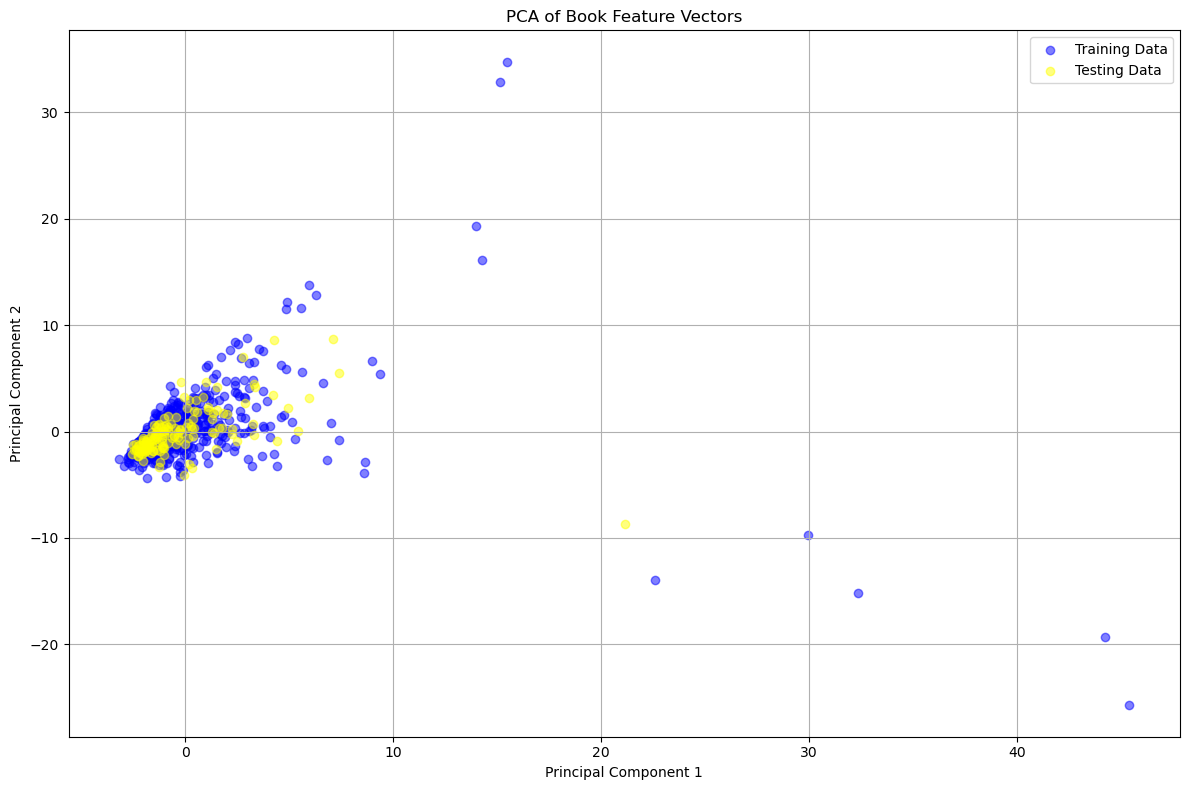

In [395]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

train_pivot_filled = train_pivot.fillna(0)
test_pivot_filled = test_pivot.fillna(0)

train_pivot_filled['index'] = range(len(train_pivot_filled))
test_pivot_filled['index'] = range(len(train_pivot_filled), len(train_pivot_filled) + len(test_pivot_filled))

scaler = StandardScaler()
train_pivot_scaled = scaler.fit_transform(train_pivot_filled.drop('index', axis=1))
test_pivot_scaled = scaler.transform(test_pivot_filled.drop('index', axis=1))

pca = PCA(n_components=2)
train_pivot_pca = pca.fit_transform(train_pivot_scaled)
test_pivot_pca = pca.transform(test_pivot_scaled)

train_pca_df = pd.DataFrame(train_pivot_pca, index=train_pivot_filled['index'], columns=['PC1', 'PC2'])
test_pca_df = pd.DataFrame(test_pivot_pca, index=test_pivot_filled['index'], columns=['PC1', 'PC2'])

plt.figure(figsize=(12, 8))
plt.scatter(train_pca_df['PC1'], train_pca_df['PC2'], c='blue', label='Training Data', alpha=0.5)
plt.scatter(test_pca_df['PC1'], test_pca_df['PC2'], c='yellow', label='Testing Data', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Book Feature Vectors')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Training Model

## **Using KNN library**

In [396]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

train_pivot_filled = train_pivot.fillna(0)

book_sparse = csr_matrix(train_pivot_filled)



knn1 = NearestNeighbors(metric='cosine', algorithm='brute')
knn1.fit(book_sparse)



NearestNeighbors(algorithm='brute', metric='cosine')

In [397]:

sample_book_index = 241


distances, indices = knn1.kneighbors(book_sparse[sample_book_index], n_neighbors=10)
similar_books_indices = indices.flatten()


In [398]:


scaler = StandardScaler()
train_pivot_scaled = scaler.fit_transform(train_pivot_filled)




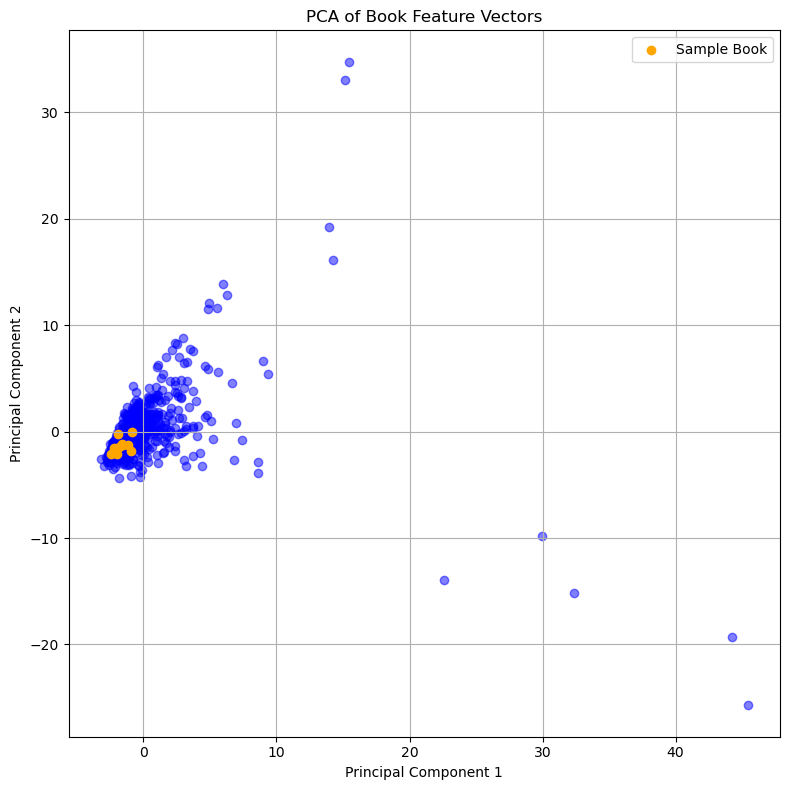

In [399]:
# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
book_pivot_pca = pca.fit_transform(train_pivot_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(book_pivot_pca, index=train_pivot_filled.index, columns=['PC1', 'PC2'])

# Lấy danh sách các sách tương tự, bỏ qua sample_book_index
distances, indices = knn1.kneighbors(book_sparse[sample_book_index], n_neighbors=10)
similar_books_indices = [idx for idx in indices.flatten() if idx != sample_book_index]

# Plotting the PCA results
plt.figure(figsize=(8, 8))

# Plot all points in blue
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, color='blue')

# Highlight the sample book in orange
plt.scatter(pca_df['PC1'].iloc[sample_book_index], pca_df['PC2'].iloc[sample_book_index], color='orange', label='Sample Book')

# Highlight the similar books in orange
for idx in similar_books_indices:
    plt.scatter(pca_df['PC1'].iloc[idx], pca_df['PC2'].iloc[idx], color='orange')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Book Feature Vectors')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [400]:
similar_books_indices

[333, 471, 392, 153, 111, 441, 65, 103, 539]

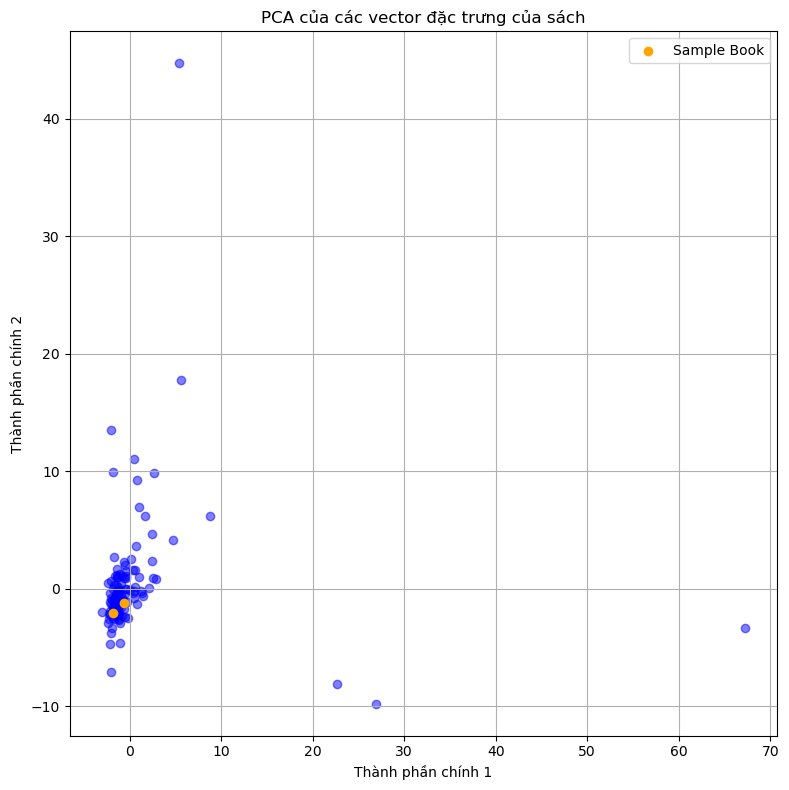

In [401]:
sample_book_index_test = 30
# Lấy danh sách các sách tương tự, bỏ qua sample_book_index_test
distances, indices = knn1.kneighbors(book_sparse[sample_book_index_test], n_neighbors=10)
similar_books_indices_test = [idx for idx in indices.flatten() if idx != sample_book_index_test]

# Thực hiện PCA để giảm xuống 2 chiều
pca = PCA(n_components=2)
book_pivot_pca = pca.fit_transform(test_pivot_scaled)

# Tạo DataFrame cho kết quả PCA
pca_df = pd.DataFrame(book_pivot_pca, index=test_pivot_filled.index, columns=['PC1', 'PC2'])

# Vẽ biểu đồ PCA
plt.figure(figsize=(8, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5, color='blue')
plt.scatter(pca_df['PC1'].iloc[sample_book_index_test], pca_df['PC2'].iloc[sample_book_index_test], color='orange', label='Sample Book')

# Vẽ các sách tương tự, bỏ qua sample_book_index_test
for idx in similar_books_indices_test:
    if idx < len(pca_df):
        plt.scatter(pca_df['PC1'].iloc[idx], pca_df['PC2'].iloc[idx], color='orange')

plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.title('PCA của các vector đặc trưng của sách')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


In [402]:
similar_books_indices_test

[207, 354, 524, 469, 465, 17, 585, 216, 284]

In [403]:

similar_book_titles = book_pivot.index[similar_books_indices_test].tolist()


for idx, title in enumerate(similar_book_titles):
    print(f"Book {idx}: {title}")

Book 0: Five Quarters of the Orange
Book 1: Mr. Murder
Book 2: The Cardinal of the Kremlin (Jack Ryan Novels)
Book 3: Sole Survivor
Book 4: Small Town Girl
Book 5: A Man Named Dave: A Story of Triumph and Forgiveness
Book 6: The Hunt for Red October
Book 7: Fried Green Tomatoes at the Whistle Stop Cafe
Book 8: Irish Hearts


In [404]:

similar_book_urls = [final_rating.iloc[idx]['image_url'] for idx in similar_books_indices_test]


for idx, url in enumerate(similar_book_urls):
    print(f"URL {idx}: {url}")

URL 0: http://images.amazon.com/images/P/044021145X.01.LZZZZZZZ.jpg
URL 1: http://images.amazon.com/images/P/0345391055.01.LZZZZZZZ.jpg
URL 2: http://images.amazon.com/images/P/0786881852.01.LZZZZZZZ.jpg
URL 3: http://images.amazon.com/images/P/0345337662.01.LZZZZZZZ.jpg
URL 4: http://images.amazon.com/images/P/0316096199.01.LZZZZZZZ.jpg
URL 5: http://images.amazon.com/images/P/0316776963.01.LZZZZZZZ.jpg
URL 6: http://images.amazon.com/images/P/0804106304.01.LZZZZZZZ.jpg
URL 7: http://images.amazon.com/images/P/0440226430.01.LZZZZZZZ.jpg
URL 8: http://images.amazon.com/images/P/0743406176.01.LZZZZZZZ.jpg


In [405]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

book_pivot_filled = book_pivot.fillna(0)


book_sparse = csr_matrix(book_pivot_filled)


knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(book_sparse)



NearestNeighbors(algorithm='brute', metric='cosine')

In [406]:
import pickle
pickle.dump(knn, open('artifacts/knn.pkl','wb'))

# Testing with new book

In [407]:
import numpy as np

def recommend_book_knn(book_id, k=5):
    if 'knn' not in globals():
        raise NameError("The KNN model is not defined. Please define and train the model before calling this function.")
    
    
    distances, indices = knn.kneighbors(book_sparse[book_id], n_neighbors=k)
    
    book_name = book_pivot.index[book_id]
    similar_books = []
    for i in range(1, len(indices[0])):  
        similar_book_index = indices[0][i]
        similar_book_name = book_pivot.index[similar_book_index]
        distance = np.linalg.norm(book_pivot.iloc[book_id] - book_pivot.iloc[similar_book_index])
        similar_books.append((similar_book_name, distance))
    total = 0
    print(f"Books similar to '{book_name}':")
    for book, distance in similar_books:
        total += distance
        print(f"{book} - Distance: {distance:.4f}") 
    print(f"Average Distance: {total/len(similar_books):.4f}")



In [408]:
book_id = 0  
recommend_book_knn(book_id)

Books similar to '1984':
Animal Farm - Distance: 53.9722
The Catcher in the Rye - Distance: 60.3407
Lord of the Flies - Distance: 64.1483
The Handmaid's Tale - Distance: 63.8279
Average Distance: 60.5723
